In [1]:
import pandas as pd

df = pd.read_csv('../assets/data/car.csv')

In [2]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [14]:
df.acceptability.unique()

array([2, 0, 3, 1])

Since most of the features are categorical text we will need to encode them as numbers using the LabelEncoder.


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = [c for c in df.columns if c != 'acceptability'] #running through all columns that aren't acceptability
for c in df.columns:
    df[c] = le.fit_transform(df[c]) #fit_transforming all the columns using le

X = df[features] #setting everything we just transformed to be our X
y = df['acceptability'] #acceptability to be our y

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Notice that we overwrote the original features for simplicity, since we are not interested in doing a study on feature importance.  

<b>Check:</b> Is it correct to use the label encoder blindly like this?  


<details>
<summary>Answer</summary>
No. The categorical features have a scale (amount of maintenance or how safe the car is, for example). It would be more appropriate to do one of the following:  
- Use pd.get_dummies to encode them as binaries  
- Use a map that correctly assigns a numerical scale to the values, e.g. where med > small  
</details>

The next step is to calculate the python cross_val_score on the two classifier:


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #this is our base classifier
bagging = BaggingClassifier(knn, max_samples=0.5, max_features=0.5) #this is us saying we want to bag a bunch of knn estimators

print "KNN Score:\t", cross_val_score(knn, X, y, cv=5, n_jobs=-1).mean()
print "Bagging Score:\t", cross_val_score(bagging, X, y, cv=5, n_jobs=-1).mean()

KNN Score:	0.643070305149
Bagging Score:	0.732692566205


In [8]:
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

## Independent practice:
1. Go back to a previous lab where you didn't have a great accuracy score/your model wasn't very good at classification.
2. Run the base estimator again, and then create a bagged classifier
3. Try changing some of the parameters and look at how that affects your model

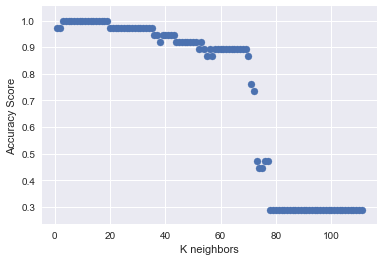

'optimal k = 19 with accuracy score = 1.0'

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)


iris['species_num'] = [0 if x =='Iris-setosa' else 1 if x == 'Iris-versicolor' else 2 if x == 'Iris-virginica' else null for x in iris.species]
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
y = iris.species


def tts_find_knn(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    n = len(y_train)
    ks = []
    scores = []
    ideal_k = 1
    for k in range(1,n):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_class = knn.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred_class)
        ks.append(k)
        scores.append(score)
        max_score = max(scores)
        if score >= max_score: 
            ideal_k = k        
    plt.scatter(ks, scores)
    plt.xlabel('K neighbors')
    plt.ylabel('Accuracy Score')
    plt.show()
    return 'optimal k = ' + str(ideal_k) + ' with accuracy score = ' + str(max_score)
    
tts_find_knn(X,y)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2) #this is our base classifier
bagging = BaggingClassifier(knn, max_samples=0.5, max_features=0.5) #this is us saying we want to bag a bunch of knn estimators

print "KNN Score:\t", cross_val_score(knn, X, y, cv=5, n_jobs=-1).mean()
print "Bagging Score:\t", cross_val_score(bagging, X, y, cv=5, n_jobs=-1).mean()

KNN Score:	0.946666666667
Bagging Score:	0.96
